# Covid 19 Cases and Death
## Data Setup
Our data comes from [Our World in Data](https://ourworldindata.org/coronavirus-source-data).
We use two feeds, the population feed and the all-four-metrics feed.

### Packages

* Covid19.jl loads, scrubs and joins the Covid19 case and population data into one dataframe
* DataFrames for representation of tabular data
* Query for support of piped query interface

In [1]:
using Covid19, DataFrames, Query
using Chain: @chain
ENV["COLUMNS"] = 180

┌ Info: Precompiling Covid19 [f23bf58e-1236-4611-95b0-5d9c7f5cb6e2]
└ @ Base loading.jl:1278
┌ Info: Precompiling Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1278


180

## Data
This is an example data frame that shows the use of our toolset.
* We start with the data for cases
* Then we choose the columns we want
* Then we filter by the country with the first cases so we'll see data
* Finally we pipe to a dataframe so we'll keep the data that way.

In [2]:
cases = @chain data() begin
        select(:location, :population, :date, :new_cases,
               :new_deaths, :total_cases, :total_deaths)
        filter(:location => ==("China"), _)
        end

,location,population,date,new_cases,new_deaths,total_cases,total_deaths
,String,Int64?,Date…,Float64,Float64,Float64,Float64
1,China,1439323774,2019-12-31,27.0,0.0,27.0,0.0
2,China,1439323774,2020-01-01,0.0,0.0,27.0,0.0
3,China,1439323774,2020-01-02,0.0,0.0,27.0,0.0
4,China,1439323774,2020-01-03,17.0,0.0,44.0,0.0
5,China,1439323774,2020-01-04,0.0,0.0,44.0,0.0
6,China,1439323774,2020-01-05,15.0,0.0,59.0,0.0
7,China,1439323774,2020-01-06,0.0,0.0,59.0,0.0
8,China,1439323774,2020-01-07,0.0,0.0,59.0,0.0
9,China,1439323774,2020-01-08,0.0,0.0,59.0,0.0


In [3]:
sum(cases.new_cases), last(cases.total_cases)

(91796.0, 91796.0)

### Show all the data for the USA

In [4]:
df = data()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths,countriesAndTerritories,continent,population_year
,Date…,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,String?,Int64?
1,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia,2020
2,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia,2020
3,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia,2020
4,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia,2020
5,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia,2020
6,2020-01-05,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia,2020
7,2020-01-06,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia,2020
8,2020-01-07,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia,2020
9,2020-01-08,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,Asia,2020


In [5]:
united_mask = df.location |> unique .|> startswith("United")
unique(df.location)[united_mask]

4-element Array{String,1}:
 "United Arab Emirates"
 "United Kingdom"
 "United States"
 "United States Virgin Islands"

In [6]:
usa_cases = @chain df begin
    select(:location, :population, :new_cases)
    filter(:location => ==("United States"), _)
end

,location,population,new_cases
,String,Int64?,Float64
1,United States,331002647,0.0
2,United States,331002647,0.0
3,United States,331002647,0.0
4,United States,331002647,0.0
5,United States,331002647,0.0
6,United States,331002647,0.0
7,United States,331002647,0.0
8,United States,331002647,0.0
9,United States,331002647,0.0


### Weight Statistics by Population

In [7]:
using Statistics
using LinearAlgebra

In [8]:
weighted_cases = @chain df begin
    transform(:population => (x -> x / maximum(skipmissing(x))) => :normed_pop)
    transform([:normed_pop, :total_cases] => ByRow(*) => :weighted_cases)
    select(:location, :total_cases, :population, :normed_pop, :weighted_cases)
    filter(:total_cases => !(==(0.0)), _)
end

,location,total_cases,population,normed_pop,weighted_cases
,String,Float64,Int64?,Float64?,Float64?
1,Afghanistan,1.0,38928341,0.00502201,0.00502201
2,Afghanistan,1.0,38928341,0.00502201,0.00502201
3,Afghanistan,1.0,38928341,0.00502201,0.00502201
4,Afghanistan,1.0,38928341,0.00502201,0.00502201
5,Afghanistan,1.0,38928341,0.00502201,0.00502201
6,Afghanistan,1.0,38928341,0.00502201,0.00502201
7,Afghanistan,1.0,38928341,0.00502201,0.00502201
8,Afghanistan,4.0,38928341,0.00502201,0.020088
9,Afghanistan,7.0,38928341,0.00502201,0.0351541


In [9]:
@chain weighted_cases begin
    groupby([:location, :population])
    combine(:weighted_cases => last)
    sort(:population, rev=true)
end

,location,population,weighted_cases_last
,String,Int64?,Float64?
1,International,missing,missing
2,World,7751547575,6.2271e7
3,China,1439323774,17044.9
4,India,1380004385,1.67222e6
5,United States,331002647,565652.0
6,Indonesia,273523621,18631.1
7,Pakistan,220892331,11261.4
8,Brazil,212559409,172489.0
9,Nigeria,206139587,1790.53


In [10]:
cases = data();

In [11]:
names(cases)

14-element Array{String,1}:
 "date"
 "location"
 "new_cases"
 "new_deaths"
 "total_cases"
 "total_deaths"
 "weekly_cases"
 "weekly_deaths"
 "biweekly_cases"
 "biweekly_deaths"
 "countriesAndTerritories"
 "continent"
 "population_year"
 "population"

In [12]:
@chain cases begin
    groupby(:location)
    combine(:new_deaths => maximum => :deaths)
    sort(:deaths, rev=true)
    filter(:location => !(==("World")), _)
    first(10)
end

,location,deaths
,String,Float64
1,United States,4928.0
2,Peru,3935.0
3,Ecuador,3800.0
4,Argentina,3351.0
5,Mexico,3013.0
6,France,2004.0
7,India,2003.0
8,Spain,1623.0
9,Bolivia,1610.0


In [13]:
@chain cases begin
    groupby(:location)
    combine(:total_deaths => maximum => :deaths)
    sort(:deaths, rev=true)
    filter(:location => !(==("World")), _)
    first(10)
end

,location,deaths
,String,Float64
1,United States,266063.0
2,Brazil,172561.0
3,India,136696.0
4,Mexico,105459.0
5,United Kingdom,58030.0
6,Italy,54363.0
7,France,52127.0
8,Iran,47486.0
9,Spain,44668.0


In [14]:
@chain cases begin
    groupby(:location)
    combine(:new_cases => maximum => :deaths)
    sort(:deaths, rev=true)
    filter(:location => !(==("World")), _)
    first(10)
end

,location,deaths
,String,Float64
1,United States,207913.0
2,India,97894.0
3,France,86852.0
4,Brazil,69074.0
5,Spain,55019.0
6,Russia,45188.0
7,Italy,40902.0
8,Chile,36179.0
9,United Kingdom,33470.0


In [15]:
@chain cases begin
    groupby(:location)
    combine(:total_cases => maximum => :deaths)
    sort(:deaths, rev=true)
    filter(:location => !(==("World")), _)
    first(10)
end

,location,deaths
,String,Float64
1,United States,1.32467e7
2,India,9.39292e6
3,Brazil,6.29027e6
4,Russia,2.26932e6
5,France,2.2087e6
6,Spain,1.62821e6
7,United Kingdom,1.60517e6
8,Italy,1.56453e6
9,Argentina,1.41336e6


In [16]:
hot = ["United States", "India", "Brazil", "France", "Mexico"]

5-element Array{String,1}:
 "United States"
 "India"
 "Brazil"
 "France"
 "Mexico"

In [17]:
using Gadfly

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1278


In [22]:
hot_cases = @chain cases begin
    select(:location, :population, :date, :new_cases,
           :new_deaths, :total_cases, :total_deaths)
    filter(:location => in(hot), _)
end;

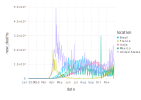

In [25]:
@chain hot_cases begin
    plot(_, x=:date, 
         y=:new_deaths,
         color=:location,
         Geom.line)
end

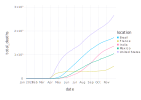

In [26]:
@chain hot_cases begin
    plot(_, x=:date, 
         y=:total_deaths,
         color=:location,
         Geom.line)
end

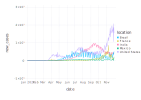

In [27]:
@chain hot_cases begin
    plot(_, x=:date, 
         y=:new_cases,
         color=:location,
         Geom.line)
end

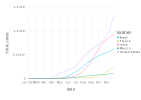

In [28]:
@chain hot_cases begin
    plot(_, x=:date, 
         y=:total_cases,
         color=:location,
         Geom.line)
end